In [1]:
import matplotlib.pyplot as plt
import matplotlib.transforms
import numpy as np
from datetime import datetime
from math import *

In [2]:
def movexAxLabelTicks(ax, fig, factor):
    #plt.setp(ax.xaxis.get_majorticklabels()) 
    dx = factor/72.; dy = 0/72. 
    offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
    for label in ax.xaxis.get_majorticklabels():
        label.set_transform(label.get_transform() - offset)

In [3]:
# PROMENNE - zde se zadava vetsina vstupnich hodnot


# Rozsah na ose x (viditelnost):
xOd = -3
xDo = 4

# Rozsah na ose y (viditelnost):
yOd = -1
yDo = 10

# Svislice:
svisla1 = 1     # ! Nastavit na 0, pokud se nepouziva
svisla2 = 0     # ! Nastavit na 0, pokud se nepouziva

# Funkce:
# Goniometricke vzorce atd. je nutne dosazovat jako numericky vypocitane pole hodnot, proto se musi pouzit napr. misto sin(x) np.sin(x)
# Pokud je funkce konstantni, napr. y = 2, musi byt navratova hodnota: return 2 + x - x     (x se vynuluje, ale matplotlib by to jinak nedokazal vykreslit)
# V pripade potreby lze pripsat definice dalsich funkci, pro svisle cary je nutne pouzit Svislice vyse

def f(x):
    eq = (x**3+np.sqrt(x))          #<--- ROVNICE
    tex= "$y=x^3+\\sqrt{{x}}$"      #<--- TEX ($y=...$)
    return [eq + x - x, tex]

def g(x):
    eq = exp(1)**(-x)               #<--- ROVNICE
    tex= "$y=e^{{-x}}$"             #<--- TEX ($y=...$)
    return [eq + x - x, tex]

def h(x):
    eq = exp(1)                     #<--- ROVNICE
    tex= "$y=e*e$"                    #<--- TEX ($y=...$)
    return [eq + x - x, tex]

# Barvy:

col1 = '#2A80EE'#015487
col2 = '#41B0E5'#41B0E5
col3 = '#015487'#91C4EB
col4 = '#404040'#41B0E5
col5 = '#707070'#91C4EB
col6 = '#B7D7FF'#B7D7FF
col7 = '#CFE8FF'#CFE8FF

# Pismo (cisla, popisky os):
csfont = {'fontname':'ISOCPEUR', 'size': 20}

# Styly car ('solid' - tenka souvisla, 'dashed' - tenka carkovana, 'dotted' - tenka teckovana)
stylFce = 'solid'
stylSvisla = 'dashed'

# Ukladat obrazky s casovou stopou v nazvu (jinak se obrazek pri ulozeni vzdy prepise)
dtNazev = False

C:\Users\mikim\AppData\Local\Temp\ipykernel_32296\1573833024.py:22: RuntimeWarning: invalid value encountered in sqrt
  eq = (x**3+np.sqrt(x))          #<--- ROVNICE


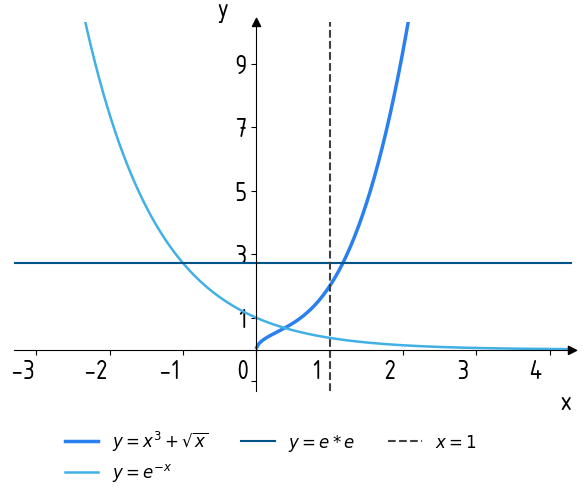

In [4]:
# Zde je vizualni nastaveni grafu, neni potreba tu cokoliv menit
x = np.linspace(xOd-1, xDo+1, 500)

fig, ax = plt.subplots()

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.xlim(xOd-0.3, xDo+0.3)
plt.ylim(yOd-0.3, yDo+0.3)

stepX=1.0
if (xDo-xOd) > 8:
    stepX=2.0
elif (xDo-xOd) > 14:
    stepX=3.0
stepY=1.0
if (yDo-yOd) > 8:
    stepY=2.0
elif (yDo-yOd) > 14:
    stepY=3.0
plt.xticks(np.arange(xOd, xDo+1, stepX))
plt.yticks(np.arange(yOd, yDo+1, stepY))
ax.yaxis.get_major_ticks()[int(-yOd+1-stepY)].label1.set_visible(False)

ax.set_xlabel('x', loc='right', style='normal', **csfont)
ax.set_ylabel('y', loc='top', rotation=0, style='normal', **csfont)

plt.yticks(**csfont)
plt.xticks(**csfont)

# Posune hodnoty na ose x doleva
movexAxLabelTicks(ax, fig, 40)


# Vykresli jednotlive funkce - staci zakomentovat, pokud funkce neni potreba
if f(x)[0].all != 0:
    plt.plot(x, f(x)[0], col1, linestyle=stylFce, linewidth=2.5, label=f(x)[1])
if g(x)[0].all != 0:
    plt.plot(x, g(x)[0], col2, linestyle=stylFce, linewidth=1.8,label=g(x)[1])
if h(x)[0].all != 0: 
    plt.plot(x, h(x)[0], col3, linestyle=stylFce, linewidth=1.5, label=h(x)[1])

ri = ax.plot((1), (0), ls="", marker='$▸$', ms=6, color="k", transform=ax.get_yaxis_transform(), clip_on=False)
up = ax.plot((0), (1), ls="", marker='$▴$', ms=6, color="k", transform=ax.get_xaxis_transform(), clip_on=False)
#le = ax.plot((0), (0), ls="", marker="<", ms=4, color="k", transform=ax.get_yaxis_transform(), clip_on=False)
#do = ax.plot((0), (0), ls="", marker="v", ms=4, color="k", transform=ax.get_xaxis_transform(), clip_on=False)

# Svislice - nemusi se zakomentovat. Zobrazi se pouze, pokud je hodnota x ruzna od 0
if svisla1 != 0:
    ax.axvline(x = svisla1, color = col4, linestyle=stylSvisla)
    plt.plot(x, 0*x+1000, col4, linestyle=stylSvisla, label=f"$x = {svisla1}$")
if svisla2 != 0:
    ax.axvline(x = svisla2, color= col5, linestyle=stylSvisla)
    plt.plot(x, 0*x+1000, col5, linestyle=stylSvisla, linewidth=1.5, label=f"$x = {svisla2}$")



# Vykresli obsah plochy mezi krivkami. Pokud je plocha ohranicena 3 a vice krivkami,
#   musi se plocha slozit z podploch (tam, kde se krivky krizi, tam na sebe plochy navazuji)
# 1. argument je vzdy x, 2. je prvni funkce, 3. je druha funkce (nastavit na 0, pokud je plocha zdola uzavrena osou x),
#   4. obsahuje prislusny interval pro vykresleni plochy.
#
# Druha moznost je vyplnovat plochu mezi krivkou a maximem (resp. minimem) z dalsich dvou krivek. Maximum (resp. minimum)
#   dve krivky spoji do jedne. V pripade 4 a vice funkci lze pouzit vnorene maximum (resp. minimum). Takovy postup umoznuje
#   elegantneji vykreslit plochu na celem intervalu a neni potreba ho tim padem delit.
#
# (Iracionalni cisla v mezich intervalu se ne vzdy vykresluji az do konce, proto je obcas nutne pricist nebo odecist nejakou setinu,
#   napr.: [(x >= -pi/2-0.02) and (x <= pi/2+0.02) for x in x], aby plocha byla "dotazena")
#                      ^^^^^                ^^^^^
#plt.fill_between(x, f(x), g(x), where = [(x >= min(svisla1, svisla2)) and (x <= max(svisla1, svisla2)) for x in x], color = col6, alpha = 0.4)
#plt.fill_between(x, 0, np.minimum(f(x),g(x)), where = [(x >= -1) and (x <= 1) for x in x], color = col6, alpha = 0.4)
#plt.fill_between(x, h(x), np.maximum(f(x),g(x)), where = [(x >= -1) and (x <= 1) for x in x], color = col6, alpha = 0.3)
#plt.fill_between(x, f(x)[0], 0, where = [(x > min(svisla1, svisla2)) and (x < max(svisla1, svisla2)) for x in x], color = col6, alpha = 0.4)


leg = plt.legend(bbox_to_anchor=(0.5, -0.05), loc="lower center", bbox_transform=fig.transFigure, ncol=3, frameon=False, prop={'size': 12}).get_frame().set_edgecolor('black')



# Vytvori .png soubor ve vyssim rozliseni
plt.tight_layout()
if dtNazev:
    plt.savefig(f'graf_{datetime.now().strftime("%Y%m%d_%H%M%S")}', dpi=400, transparent=True)
else:
    plt.savefig('graph.png', dpi=400, bbox_inches='tight', bbox_extra_artists=(leg), transparent=True)

# Posune hodnoty na ose x o kus zpet, aby se v nahledu s nizsi kvalitou zobrazily na spravnem miste
movexAxLabelTicks(ax, fig, -30)